# Practical Linear Algebra for Data Science
## Mike X Cohen (sincxpress.com)
### https://www.oreilly.com/library/view/practical-linear-algebra/9781098120603/

#### Code for chapter 7

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# setup animation
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')


# to read an image from a url (io) and convert it to grayscale (color)
from skimage import io,color
# convolution
from scipy.signal import convolve2d


import pandas as pd


# NOTE: these lines define global figure properties used for publication.
from IPython import display
display.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

/var/folders/8_/1s5ps_mn2158pygkkqf7rh440000gn/T/ipykernel_3803/2208530454.py:22: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg') # display figures in vector format


# Covariance matrix

In [ ]:
# information about the data
#https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

# raw data file
#https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data

# dataset citation (see also above website for more):
# Redmond, M. A. and A. Baveja: A Data-Driven Software Tool for Enabling Cooperative Information Sharing Among Police Departments. European Journal of Operational Research 141 (2002) 660-678.

In [4]:
# read the data into a pandas dataframe
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
data = pd.read_csv(url,sep=',',header=None)

# attach column labels (don't worry, I didn't type this all in by hand, lol)
data.columns = [ 'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 
'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 
'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 
'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 
'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 
'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 
'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 
'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 
'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 
'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 
'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 
'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 
'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop', 
 ]

# have a look at the data
data

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [5]:
# extract only the numeric data
numberDataset = data._get_numeric_data()

# drop a few additional columns, and convert to a numpy array
dataMat = numberDataset.drop(['state','fold'],axis=1).values
dataMat

array([[0.19, 0.33, 0.02, ..., 0.2 , 0.32, 0.2 ],
       [0.  , 0.16, 0.12, ..., 0.45, 0.  , 0.67],
       [0.  , 0.42, 0.49, ..., 0.02, 0.  , 0.43],
       ...,
       [0.16, 0.37, 0.25, ..., 0.18, 0.91, 0.23],
       [0.08, 0.51, 0.06, ..., 0.33, 0.22, 0.19],
       [0.2 , 0.78, 0.14, ..., 0.05, 1.  , 0.48]])

2.4498401746994428e-18


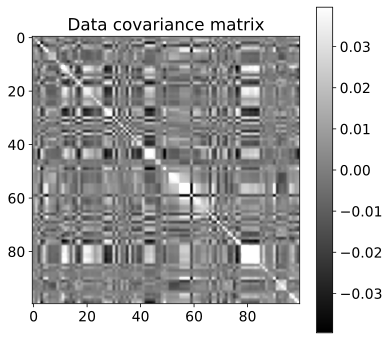

In [6]:
# compute the mean of each data feature
datamean = np.mean(dataMat,axis=0)

# mean-center the data using broadcasting
dataMatM = dataMat - datamean

# confirm that any given feature has mean=0 (or very close...)
print(np.mean(dataMatM[:,0]))


# Now to compute the covariance matrix
covMat = dataMatM.T @ dataMatM  # data matrix times its transpose
covMat /= (dataMatM.shape[0]-1) # divide by N-1

# dynamic color scaling
clim = np.max(np.abs(covMat)) * .2

# and show it
plt.figure(figsize=(6,6))
plt.imshow(covMat,vmin=-clim,vmax=clim,cmap='gray')
plt.colorbar()
plt.title('Data covariance matrix')
plt.savefig('Figure_07_01.png',dpi=300)
plt.show()

# Transformation matrices

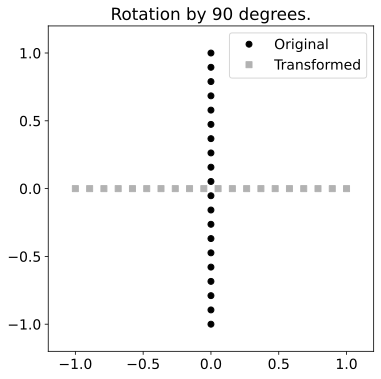

In [11]:
# Pure rotation matrix

# angle to rotate by
th = np.pi/2

# transformation matrix
T = np.array([ 
              [ np.cos(th),np.sin(th)],
              [-np.sin(th),np.cos(th)]
            ])


# original dots are a vertical line
x = np.linspace(-1,1,20)
origPoints = np.vstack( (np.zeros(x.shape),x) )


# apply the transformation
transformedPoints = T @ origPoints


# plot the points
plt.figure(figsize=(6,6))
plt.plot(origPoints[0,:],origPoints[1,:],'ko',label='Original')
plt.plot(transformedPoints[0,:],transformedPoints[1,:],'s',color=[.7,.7,.7],label='Transformed')

plt.axis('square')
plt.xlim([-1.2,1.2])
plt.ylim([-1.2,1.2])
plt.legend()
plt.title(f'Rotation by {np.rad2deg(th):.0f} degrees.')
plt.savefig('Figure_07_02.png',dpi=300)
plt.show()

# Animating transformations

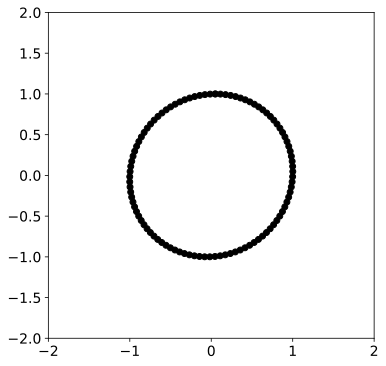

In [12]:
# function to update the axis on each iteration
def aframe(ph):

  # create the transformation matrix
  T = np.array([
                 [  1, 1-ph ],
                 [  0, 1    ]
                ])
  
  # apply the transformation to the points using matrix multiplication
  P = T@points

  # update the dots
  plth.set_xdata(P[0,:])
  plth.set_ydata(P[1,:])

  # export the plot handles
  return plth


# define XY points
theta  = np.linspace(0,2*np.pi,100)
points = np.vstack((np.sin(theta),np.cos(theta)))


# setup figure
fig,ax = plt.subplots(1,figsize=(12,6))
plth,  = ax.plot(np.cos(x),np.sin(x),'ko')
ax.set_aspect('equal')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])

# define values for transformation (note: clip off the final point for a smooth animation loop)
phi = np.linspace(-1,1-1/40,40)**2

# run animation!
animation.FuncAnimation(fig, aframe, phi, interval=100, repeat=True)

# Image convolution

In [ ]:
# image
imgN  = 20
image = np.random.randn(imgN,imgN)

# convolution kernel
kernelN = 7
Y,X     = np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
kernel  = np.exp( -(X**2+Y**2)/7 )
kernel  = kernel / np.sum(kernel) # normalize

In [ ]:
# now for the convolution
halfKr = kernelN//2
convoutput = np.zeros((imgN+kernelN-1,imgN+kernelN-1))

imagePad = np.zeros(convoutput.shape)
imagePad[halfKr:-halfKr:1,halfKr:-halfKr:1] = image


# double for-loop over rows and columns (width and height of picture)
for rowi in range(halfKr,imgN+halfKr):
  for coli in range(halfKr,imgN+halfKr):

    # cut out a piece of the image
    pieceOfImg = imagePad[rowi-halfKr:rowi+halfKr+1:1,coli-halfKr:coli+halfKr+1:1]

    # dot product: element-wise multiply and sum
    dotprod = np.sum( pieceOfImg*kernel )

    # store the result for this pixel
    convoutput[rowi,coli] = dotprod


# trim off edges
convoutput = convoutput[halfKr:-halfKr:1,halfKr:-halfKr:1]

In [ ]:
# using scipy
convoutput2 = convolve2d(image,kernel,mode='same')

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].imshow(image)
ax[0,0].set_title('Image')

ax[0,1].imshow(kernel)
ax[0,1].set_title('Convolution kernel')

ax[1,0].imshow(convoutput)
ax[1,0].set_title('Manual convolution')

ax[1,1].imshow(convoutput2)
ax[1,1].set_title("Scipy's convolution")

# for i in ax.flatten(): i.axis('off')

plt.savefig('Figure_07_04b.png',dpi=300)
plt.show()

(1675, 3000, 3)


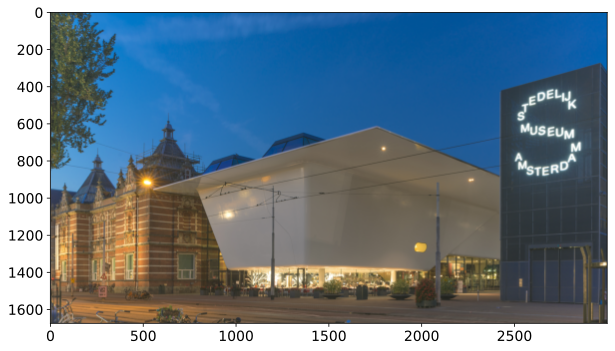

(1675, 3000)


In [28]:
# read a pic from the web
bathtub = io.imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')

# check the size
print(bathtub.shape)

# let's see what the famous Bathtub Museum looks like
fig = plt.figure(figsize=(10,6))
plt.imshow(bathtub)
plt.savefig('Figure_07_05a.png',dpi=300)
plt.show()

# transform image to 2D for convenience (not necessary for convolution!)
bathtub2d = color.rgb2gray(bathtub)

# check the size again
print(bathtub2d.shape)

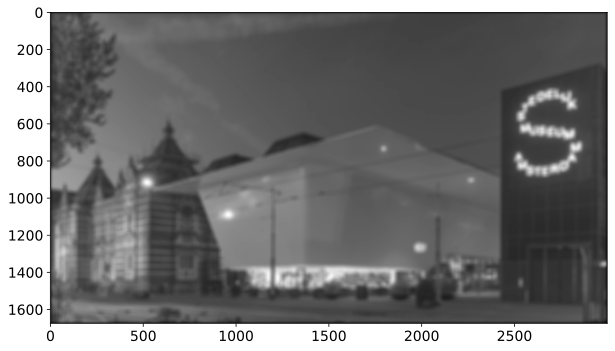

In [30]:
# convolution kernel
kernelN = 29 # a bit bigger than in the previous example... feel free to change this parameter!
Y,X     = np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
kernel  = np.exp( -(X**2+Y**2)/20 )
kernel  = kernel / np.sum(kernel) # normalize the kernel to integrate to 1, which preserves the numerical scale of the image.


# smoothing via Gaussian convolution
smooth_bathtub = convolve2d(bathtub2d,kernel,mode='same')

fig = plt.figure(figsize=(10,6))
plt.imshow(smooth_bathtub,cmap='gray')
plt.savefig('Figure_07_05b.png',dpi=300)
plt.show()

# Exercise 1

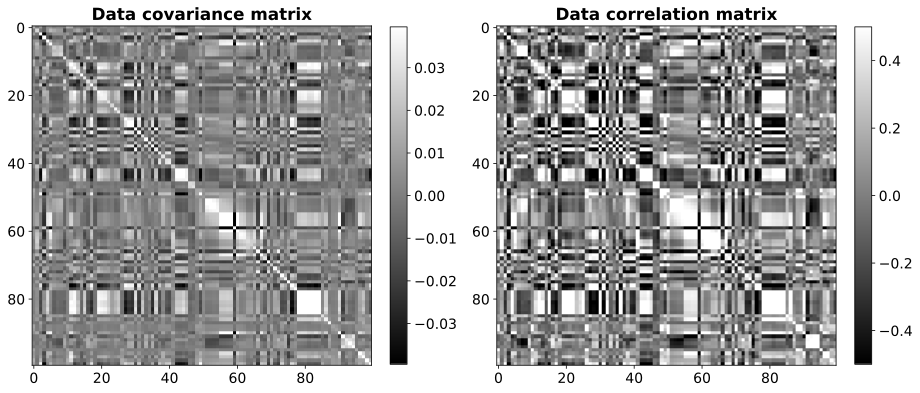

In [7]:
# Diagonal matrix of inverse standard deviations
variances = np.diag(covMat) # variances are the diagonals of a covariance
standard_devs = np.sqrt( variances )
S = np.diag( 1/standard_devs )

# you can also do this in one line:
#S = np.diag( 1/np.sqrt(np.diag(covMat)) )


# compute the correlation matrix
corrMat = S @ covMat @ S


# and show the matrices
fig,axs = plt.subplots(1,2,figsize=(13,6))
h1 = axs[0].imshow(covMat,vmin=-clim,vmax=clim,cmap='gray')
axs[0].set_title('Data covariance matrix',fontweight='bold')

h2 = axs[1].imshow(corrMat,vmin=-.5,vmax=.5,cmap='gray')
axs[1].set_title('Data correlation matrix',fontweight='bold')

fig.colorbar(h1,ax=axs[0],fraction=.045)
fig.colorbar(h2,ax=axs[1],fraction=.045)

plt.tight_layout()
plt.savefig('Figure_07_06.png',dpi=300)
plt.show()

In [12]:
print(
    f'standard devs shape: {standard_devs.shape}',
    f'S shape: {S.shape}',
    sep='\n'
)

standard devs shape: (100,)
S shape: (100, 100)


In [16]:
# a bit of code to explore specific pairs of correlations

# here list two indices into the correlation matrix (row, col)
i,j = 43,17

# the printed tuple will show the correlation and the pairs of variables
corrMat[i,j], data.columns[i], data.columns[j]

(-0.7603179079300489, 'MalePctDivorce', 'medIncome')

# Exercise 2

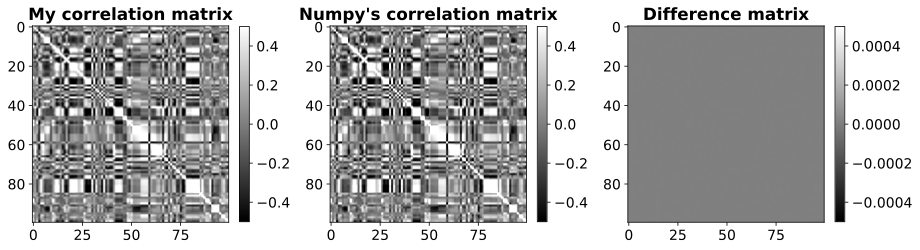

In [17]:
# numpy's correlation function (note transposing the matrix!)
corrMat_np = np.corrcoef(dataMat.T)


# and show it
fig,axs = plt.subplots(1,3,figsize=(13,6))
h1 = axs[0].imshow(corrMat,vmin=-.5,vmax=.5,cmap='gray')
axs[0].set_title('My correlation matrix',fontweight='bold')

h2 = axs[1].imshow(corrMat_np,vmin=-.5,vmax=.5,cmap='gray')
axs[1].set_title("Numpy's correlation matrix",fontweight='bold')

h3 = axs[2].imshow(corrMat_np-corrMat,vmin=-.0005,vmax=.0005,cmap='gray')
axs[2].set_title('Difference matrix',fontweight='bold')

fig.colorbar(h1,ax=axs[0],fraction=.045)
fig.colorbar(h2,ax=axs[1],fraction=.045)
fig.colorbar(h3,ax=axs[2],fraction=.045)

plt.tight_layout()
plt.savefig('Figure_07_07.png',dpi=300)
plt.show()

In [18]:
??np.corrcoef

Signature:
np.corrcoef(
    x,
    y=None,
    rowvar=True,
    bias=<no value>,
    ddof=<no value>,
    *,
    dtype=None,
)
Source:   
@array_function_dispatch(_corrcoef_dispatcher)
def corrcoef(x, y=None, rowvar=True, bias=np._NoValue, ddof=np._NoValue, *,
             dtype=None):
    """
    Return Pearson product-moment correlation coefficients.

    Please refer to the documentation for `cov` for more detail.  The
    relationship between the correlation coefficient matrix, `R`, and the
    covariance matrix, `C`, is

    .. math:: R_{ij} = \\frac{ C_{ij} } { \\sqrt{ C_{ii} * C_{jj} } }

    The values of `R` are between -1 and 1, inclusive.

    Parameters
    ----------
    x : array_like
        A 1-D or 2-D array containing multiple variables and observations.
        Each row of `x` represents a variable, and each column a single
        observation of all those variables. Also see `rowvar` below.
    y : array_like, optional
        An additional set of variables and obse

In [ ]:
??np.cov

# Exercise 3

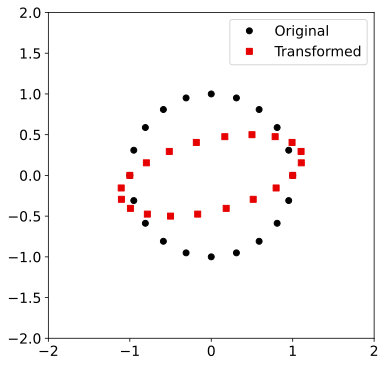

In [24]:
# Transformation matrix
T = np.array([ 
  [1,.5],
  [0,.5]
])

# define the set of points (a circle)
theta = np.linspace(0,2*np.pi-2*np.pi/20,20)
origPoints = np.vstack( (np.cos(theta),np.sin(theta)) )

# apply transformation
transformedPoints = T @ origPoints


# plot the points
plt.figure(figsize=(6,6))
plt.plot(origPoints[0,:],origPoints[1,:],'ko',label='Original')
plt.plot(transformedPoints[0,:],transformedPoints[1,:],'s',
         color=[.9,.0,.0],label='Transformed')

plt.axis('square')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.savefig('Figure_07_08.png',dpi=300)
plt.show()

# Exercise 4

In [25]:
# function to draw the plots
def aframe(ph):

  # create the transformation matrix
  T = np.array([ [  1-ph/3,0 ],
                 [  0,ph   ] ])
  
  # apply the transformation to the points using matrix multiplication
  P1 = T@Y1
  P2 = T@Y2

  # update the lower/upper lines
  plth1.set_xdata(P1[0,:])
  plth1.set_ydata(P1[1,:])

  plth2.set_xdata(P2[0,:])
  plth2.set_ydata(P2[1,:])

  # export the plot handles
  return (plth1,plth2)

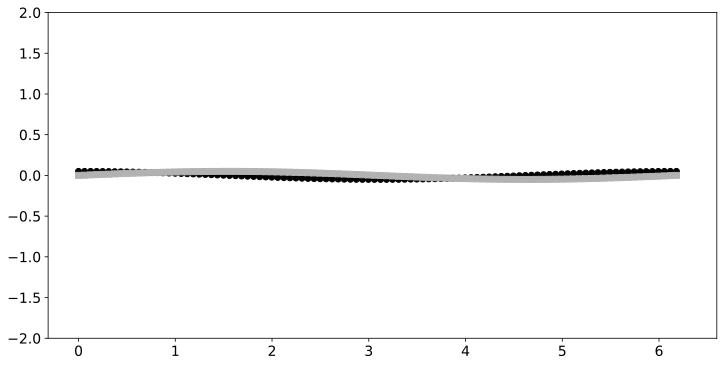

In [26]:
# define XY points
th = np.linspace(0,2*np.pi,100) # th = theta (angles)
Y1 = np.vstack((th,np.cos(th)))
Y2 = np.vstack((th,np.sin(th)))


# setup figure
fig,ax = plt.subplots(1,figsize=(12,6))

plth1, = ax.plot(Y1[0,:],Y1[1,:],'ko')
plth2, = ax.plot(Y2[0,:],Y2[1,:],'s',color=[.7,.7,.7])
ax.set_ylim([-2,2])


# define phases and run animation
phi = 1-np.linspace(-1,1-1/40,40)**2
animation.FuncAnimation(fig, aframe, phi, interval=50, repeat=True)

# Exercise 5

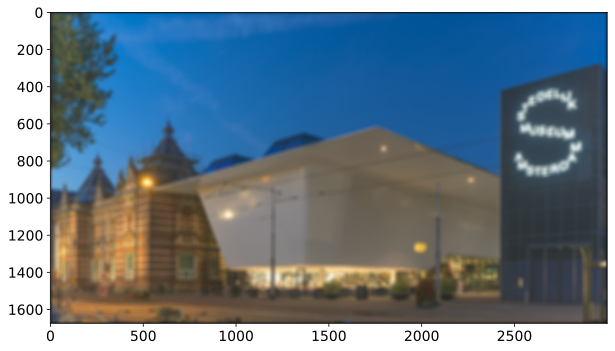

In [31]:
# initialize smoothed image
smooth_bathtub = np.zeros(bathtub.shape)

# smooth each layer individually
for i in range(smooth_bathtub.shape[2]):
  smooth_bathtub[:,:,i] = convolve2d(bathtub[:,:,i],kernel,mode='same')


fig = plt.figure(figsize=(10,6))
plt.imshow(smooth_bathtub.astype(np.uint8))
plt.show()

In [32]:
# check data types
print( smooth_bathtub.dtype )
print( smooth_bathtub.astype(np.uint8).dtype )

float64
uint8


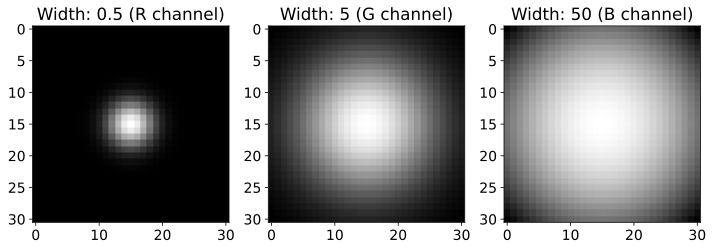

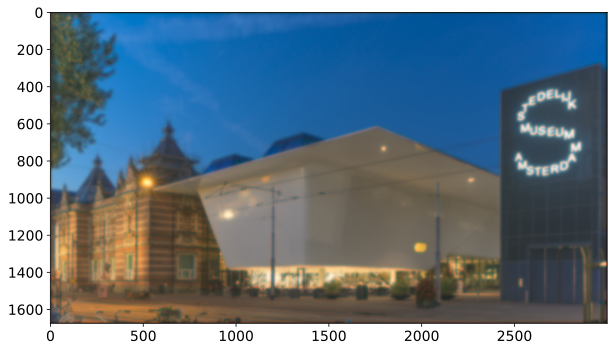

In [33]:
# layer-specific kernel widths
kernelN = 31
kernelWidths = [.5,5,50]


# initialize smoothed image
smooth_bathtub = np.zeros(bathtub.shape)

# to show the kernels
_,axs = plt.subplots(1,3,figsize=(12,6))

# smooth each layer individually
for i in range(smooth_bathtub.shape[2]):

  # create kernel
  Y,X     = np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
  kernel  = np.exp( -(X**2+Y**2) / kernelWidths[i] )
  kernel  = kernel / np.sum(kernel) # normalize
  
  # visualize the kernels
  axs[i].imshow(kernel,cmap='gray')
  axs[i].set_title(f'Width: {kernelWidths[i]} ({"RGB"[i]} channel)')

  # now run convolution
  smooth_bathtub[:,:,i] = convolve2d(bathtub[:,:,i],kernel,mode='same')

plt.savefig('Figure_07_10.png',dpi=300)
plt.show() # close the kernels figure


# show the smoothed image
fig = plt.figure(figsize=(10,6))
plt.imshow(smooth_bathtub.astype(np.uint8))
plt.show()

# Exercise 6

In [34]:
# Create two feature-detection kernels

# vertical kernel
VK = np.array([ [1,0,-1],
                [1,0,-1],
                [1,0,-1] ])

# horizontal kernel
HK = np.array([ [ 1, 1, 1],
                [ 0, 0, 0],
                [-1,-1,-1] ])

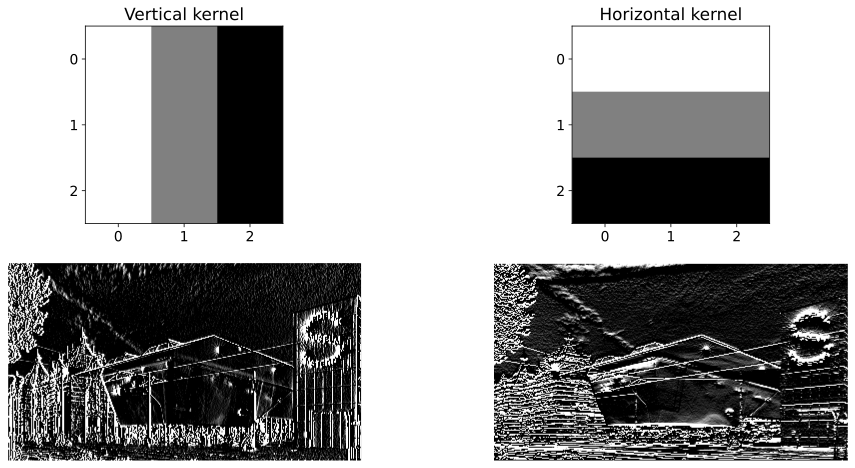

In [35]:
fig,ax = plt.subplots(2,2,figsize=(16,8))

ax[0,0].imshow(VK,cmap='gray')
ax[0,0].set_title('Vertical kernel')
ax[0,0].set_yticks(range(3))

ax[0,1].imshow(HK,cmap='gray')
ax[0,1].set_title('Horizontal kernel')
ax[0,1].set_yticks(range(3))

# run convolution and show the result
convres = convolve2d(bathtub2d,VK,mode='same')
ax[1,0].imshow(convres,cmap='gray',vmin=0,vmax=.01)
ax[1,0].axis('off')

convres = convolve2d(bathtub2d,HK,mode='same')
ax[1,1].imshow(convres,cmap='gray',vmin=0,vmax=.01)
ax[1,1].axis('off')

plt.savefig('Figure_07_11.png',dpi=300)
plt.show()